# Kaggle入门竞赛项目：泰坦尼克号预测

目的：二类分类问题，目的在于预测乘客是否能够生还，即预测测试集中Survived变量为1还是0、

度量：accuracy

分析流程：<br \>
1. 数据探索（EDA）
2. 特征工程
3. 建模

使用的库：
- **pandas**用于数据处理
- **numpy**多维数组计算
- **matplotlib**和**seaborn**进行数据可视化
- **sklearn**机器学习库，进行数据建模和预测

## 1. EDA

首先对图表的样式进行微调：

In [8]:
from IPython.core.display import HTML
HTML('''
<style>
.output-png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

接下来导入库：

In [9]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = {
    'axes.labelsize' : 'large',
    'xtick.labelsize' : 'x-large',
    'legend.fontsize' : 20,
    'figure.dpi' : 150,
    'figure.figsize' : [25, 7]
}
plot.rcParams.update(params)

两个数据集——训练集和测试集<br \>
- 训练集：用于建立模型
- 测试集：对训练集以外的数据进行预测，对模型进行评估

首先读取训练集：

In [11]:
data = pd.read_csv('train.csv')

In [12]:
data.shape

(891, 12)

可知，训练集有891行、12列

通过pandas的head方法可查看前几行数据：

In [13]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


其中，survived列为目标变量（target variable）。如果surivied=1，则该乘客被营救；否则乘客死亡。

其他特征有：
- PassengerId：乘客Id，对预测无意义，可以去掉
- Pclass：乘客的舱位等级，有三种可能值：1，2，3（一等舱、二等舱、三等舱）
- Name：乘客姓名
- Sex：乘客性别
- Age：乘客年龄
- SibSp：与该乘客同行的配偶及兄弟姐妹的个数
- Parch：与该乘客同行的父母及子女的个数
- Ticket：船票号码
- Fare：船票价格
- Cabin：船舱号码
- Embarked：乘客可能登船的三个港口，分别以S、C、Q表示

通过pandas的describe()方法可以获得数据中数值型特征的统计学描述：

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过上表中的count变量可知，Age列中有177各数据缺失。

### 分析Age特征

由于缺失的数量较少，可使用数据中年龄的平均值或中位数来填补缺失。由于中位数收到异常值的影响较小，因此下面使用中位数：

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可以看到，Age列中的缺失值已经全部被填满。

下面观察性别与获救率之间的关系：

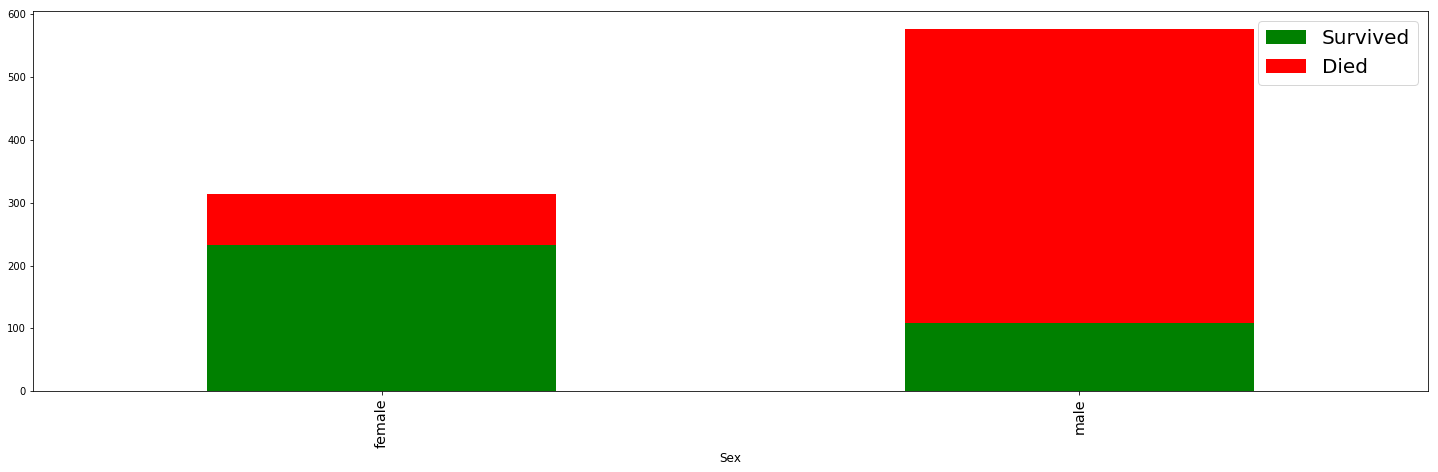

In [17]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25,7), stacked=True, colors=['g', 'r'])

可以看到，女性的获救率更高。

按比例做出的图表更加直观：

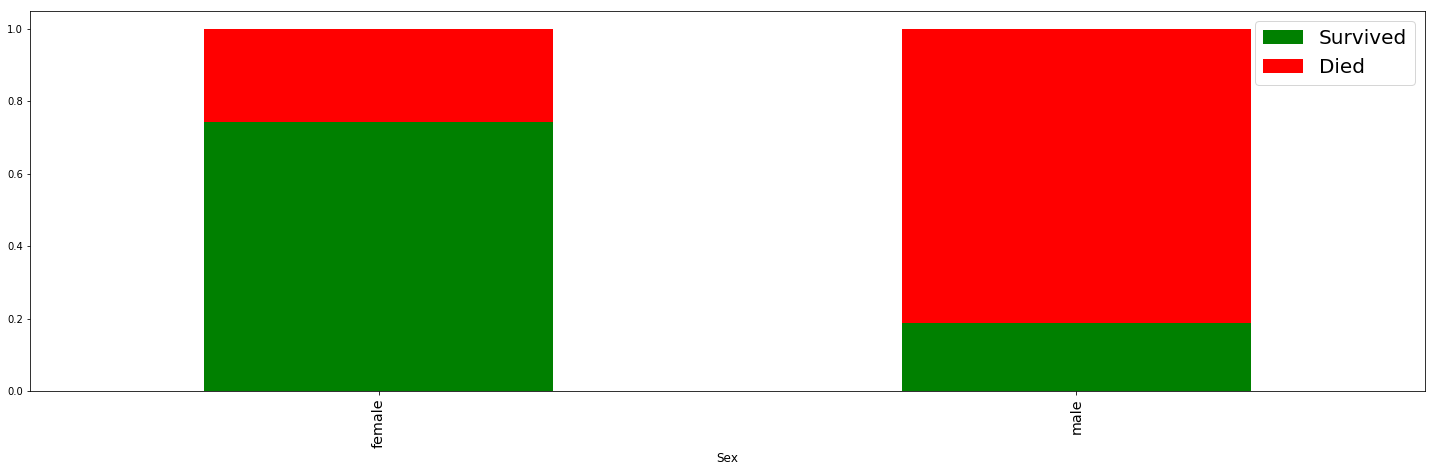

In [19]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25,7), stacked=True, colors=['g', 'r'])

由此可见，Sex是一个重要的判别特征。

下面查看survival和age两个变量之间的相关性：

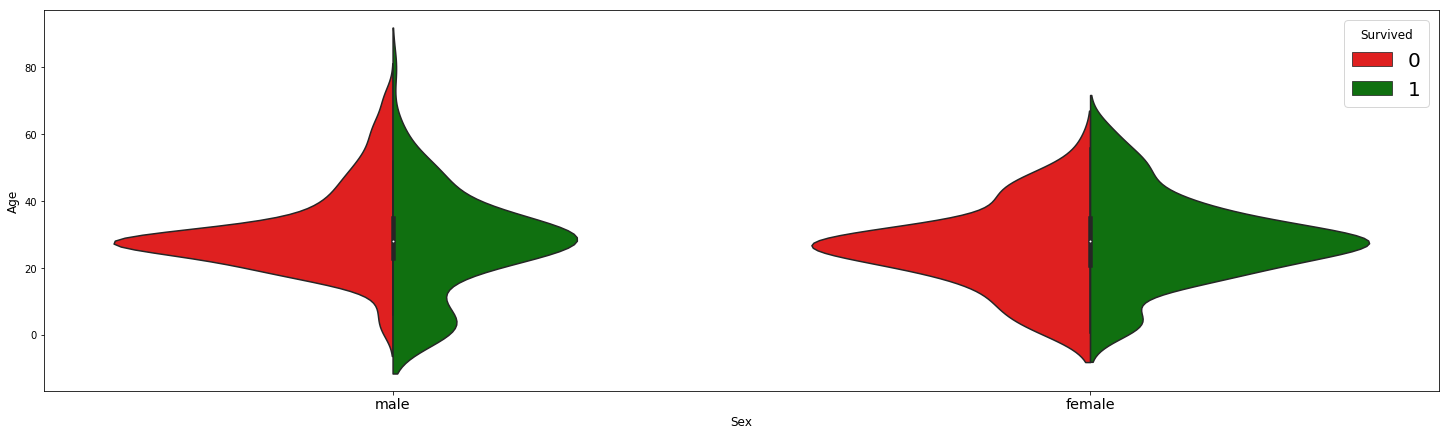

In [20]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=data,
              split=True, palette={0:'r', 1:'g'})

在上图中，代表女性的图中绿色占比更大，因此女性比男性获救率更高。

从左图中可以发现：
- 男性幼童获救率更高
- 20到40岁的男性死亡率更高
从右图中可以发现：女性年龄对获救率没有直接的影响

### 分析Ticket特征

现在观察船票价格对获救率的影响：

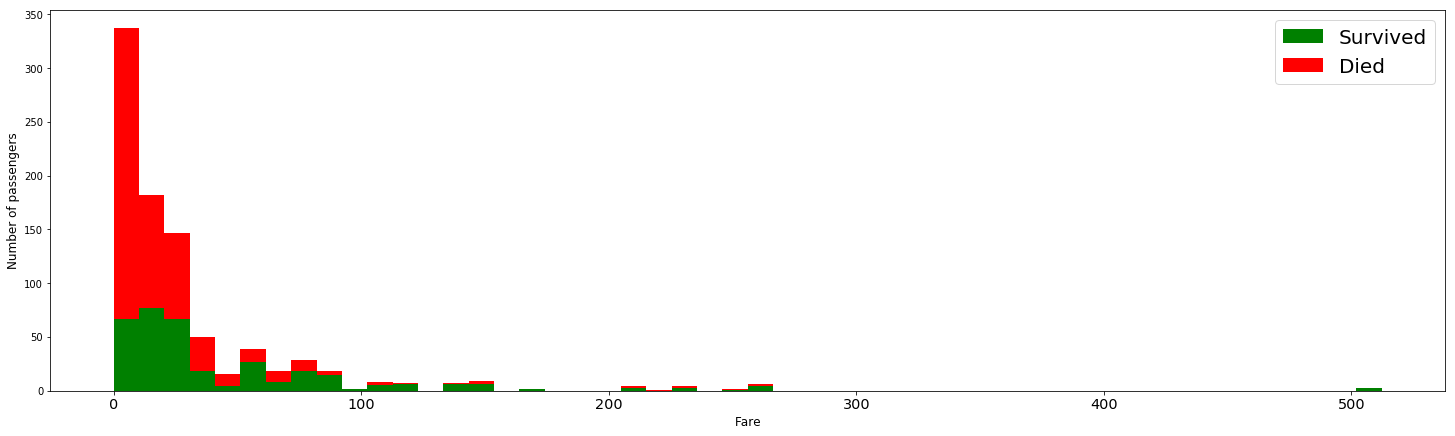

In [22]:
figure = plt.figure(figsize=(25,7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
        stacked=True, color=['g', 'r'],
        bins=50, label=['Survived', 'Died'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

从图中可以看出，持有低价船票的乘客死亡率更高；持有高价船票的乘客获救率更高，他们有更高的社会地位，因此更早的获救。

下面使用散点图，观察乘客年龄、船票价格与获救率的关系：

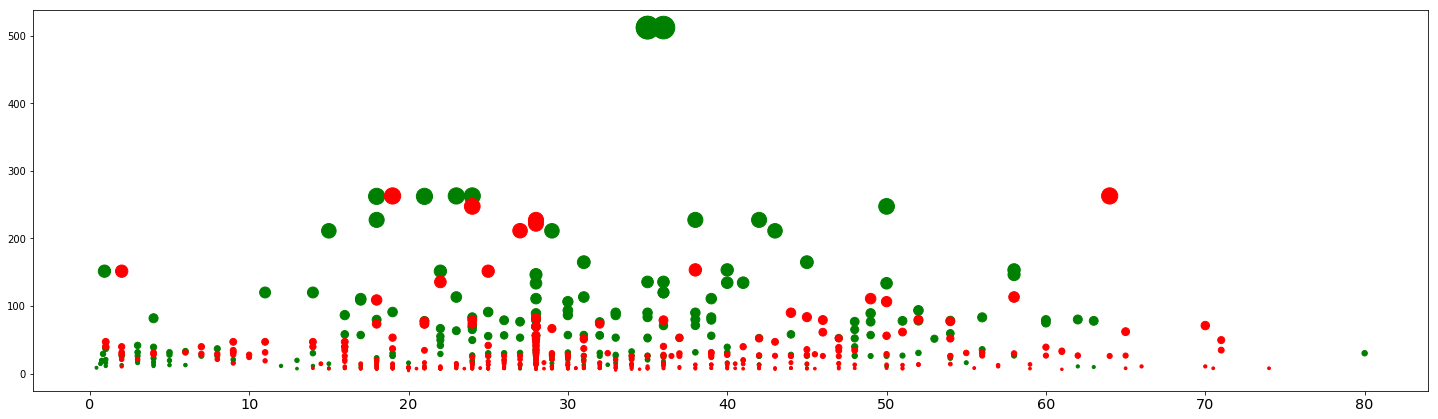

In [24]:
plt.figure(figsize=(25,7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'],
          c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'],
          c='red', s=data[data['Survived'] == 0]['Fare'])

其中，圆形的大小正比于船票价格，圆形越大，船票价格越高。<br \>
上图中，x轴为年龄，y轴为船票价格。<br \><br \>
从图中可以看到：
1. 在x=20至x=45之间，持高价船票的乘客获救率更高
2. 在x=20至x=50之间，持低价船票的乘客死亡率更高
3. 在x=0至x=6之间，即儿童乘客，获救率更高

### 分析Pclass特征

事实上，船票价格与舱位等级直接相关，见下表：

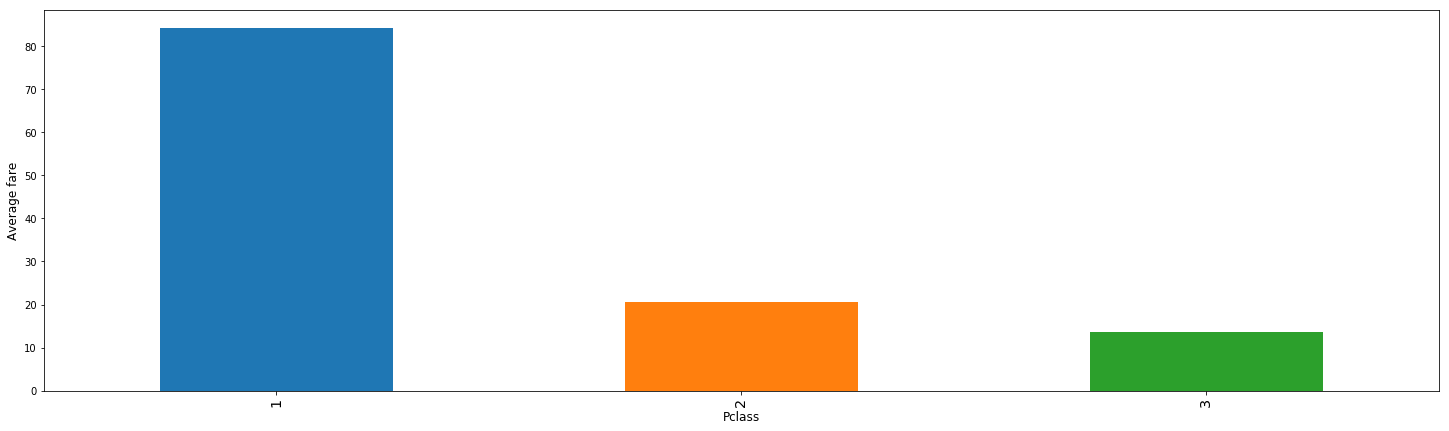

In [26]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25,7), ax=ax)

### 分析Embarked特征

下面观察登船港口与获救率的关系：

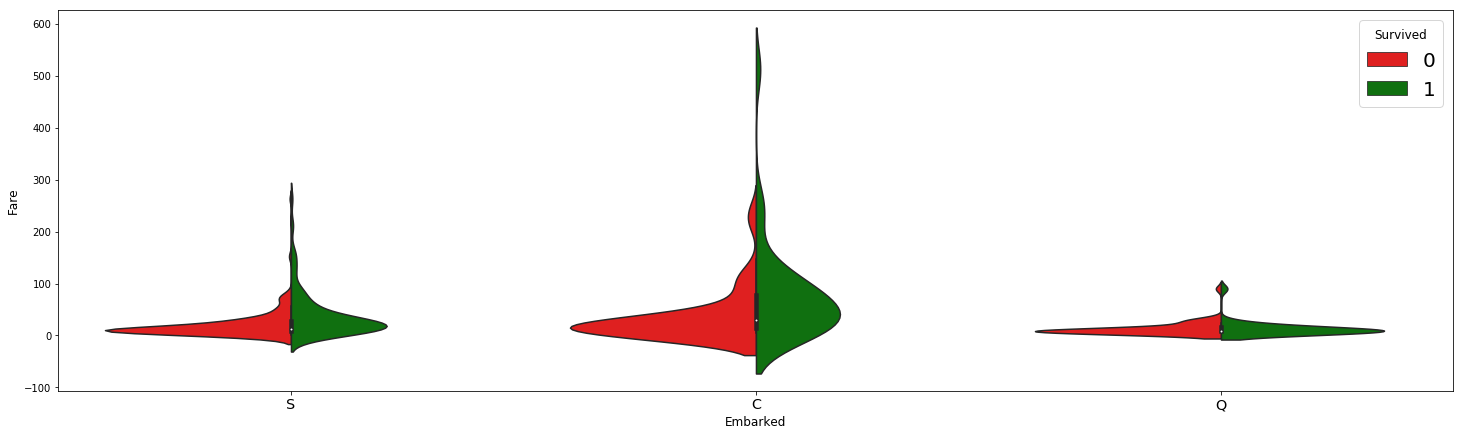

In [28]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0:'r', 1:'g'})

可以看到，C港口登船的乘客持有的船票价格范围更大，拥有高价票的乘客更容易获救。

## 2. 特征工程

为了获知某个特征是否已经处理完成，首先定义一个print函数：

In [31]:
def status(feature):
    print('Processing', feature, 'OK')

### 读取数据

在特征工程环节，将训练集和测试集合并在一起处理会更加方便：

In [35]:
def get_combined_data():
    # read training data
    train = pd.read_csv('train.csv')
    
    # read testing data
    test = pd.read_csv('test.csv')
    
    # extract and then remove the targets from the training data
    targets = train.Survived
    train.drop(['Survived'], axis=1, inplace=True)
    
    # merge train data and test data for future feature engineering
    # remove PassengerID as well since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [36]:
combined = get_combined_data()

In [37]:
combined.shape

(1309, 10)

通过pandas的shape属性可以看出，两个几何的数据已经合并。

In [40]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 提取乘客头衔

在Name列中，都有该乘客的头衔，头衔可以代表乘客的社会地位，这对是否容易获救会有所影响。

首先观察训练集中出现了多少种头衔：

In [41]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [42]:
print(titles)

{'Col', 'the Countess', 'Master', 'Dr', 'Lady', 'Capt', 'Sir', 'Jonkheer', 'Mrs', 'Ms', 'Miss', 'Rev', 'Mlle', 'Don', 'Major', 'Mme', 'Mr'}


接下来提取头衔并对不同头衔归类：

In [43]:
Title_Dictionary = {
    'Capt': 'Officer',
    'Col' : 'Officer',
    'Major': 'Officer',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'the Countess': 'Royalty',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Lady': 'Royalty'
}

def get_titles():
    # extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregrated title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

共选择了六种类别：
- Officer
- Royalty
- Mr
- Mrs
- Miss
- Master

In [45]:
combined = get_titles()

Processing Title OK


In [46]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


现在检查Title列是否已经被填满：

In [47]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


在1305行没有填写Title项，因为该乘客的头衔为Dona，没有在训练集出现过，因此可以忽略掉。

### 处理Age特征

在Age特征中，共有177各缺失值，大约占数据集的13%。因此，仅仅使用平均值或中位数填充缺失值可能并不能很好的解决问题。<br \>
现在根据性别（Sex）、头衔（Title）和乘客等级（Pclass）对数据集进行分组，对每个子集，计算年龄中位数。<br \>
为了避免测试集出现数据泄露，测试集中填补缺失值的中位数将由训练集计算获得。

训练集中年龄缺失共有：

In [50]:
combined['Age'][:891].isnull().sum()

177

测试集中年龄缺失共有：

In [51]:
combined['Age'][891:].isnull().sum()

86

In [56]:
grouped_train = combined[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex',  'Pclass','Title', 'Age']]

In [57]:
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


下面根据上表中的中位数填充**combined**数据集中的缺失值：

In [58]:
def fill_age(row):
    condition = (
    (grouped_median_train['Sex'] == row['Sex']) &
    (grouped_median_train['Title'] == row['Title']) &
    (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def press_age():
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [59]:
combined = press_age()

Processing age OK


### 处理Name特征

由于Name中头衔已经被提取出来，Name特征不会有其他的用途，因此该特征将会从数据集中去掉。<br \>
对Title特征， 通过dummy encoding方法将cateborical变量转变为binary变量：

In [61]:
def process_names():
    global combined
    # clean the name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

In [62]:
combined = process_names()

Processing names OK


In [63]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


由表中可见：
- Name变量已经被删除
- 添加了新的变量(Title_X)，新变量都是binary变量

### 处理Fare特征

Fare变量中有一个缺失值，使用数据集中Fare的平均值填充缺失：

In [64]:
def process_fare():
    global combined
    # replace the missing fare with the mean
    combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)
    status('fare')
    return combined

In [65]:
combined = process_fare()

Processing fare OK


### 处理Embarked特征

Embarked中有两个缺失值，用最常出现的S值填充：

In [67]:
def process_embarked():
    global combined
    # replace the missing embarked with the most frequent embarkation in the train which is S
    combined['Embarked'].fillna('S', inplace=True)
    
    # dummy encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [68]:
combined = process_embarked()

Processing embarked OK


In [69]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 处理Cabin特征

分别提取训练集和测试集中舱位的字母：

In [71]:
train_cabin, test_cabin = set(), set()
for c in combined[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [72]:
train_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'}

In [73]:
test_cabin

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'}

可以看到，测试集中的舱位字母全部包含在训练集中。

首先处理缺失值，使用U填充，表示Unknown，然后提取Cabin中的第一个字母，使用dummy encoding对Cabin变量进行转换：

In [75]:
def process_cabin():
    global combined
    # replacing missing cabins with U(Unknown)
    combined['Cabin'].fillna('U', inplace=True)
    
    #mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [76]:
combined = process_cabin()

Processing cabin OK


In [77]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### 处理Sex特征

将male表示为1，女性表示为0：

In [81]:
def process_sex():
    global combined
    # mapping string values to numerical values
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female': 0})
    status('sex')
    return combined

In [82]:
combined = process_sex()

Processing sex OK


### 处理Pclass特征：

同样，对该特征进行dummy encoding：

In [84]:
def process_pclass():
    global combined
    #dummy encoding
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    # drop pclass
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('pclass')
    return combined

In [85]:
combined = process_pclass()

Processing pclass OK


### 处理Ticket特征

In [86]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

In [87]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [88]:
def process_ticket():
    global combined
    # extract each prefix of the ticket, returns 'XXX' if no letter prefix
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t: t.strip(), ticket)
        ticket = list(filter(lambda t: not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else:
            return 'XXX'
        
    # extract dummy variables from tickets
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('tickets')
    return combined   

In [89]:
combined = process_ticket()

Processing tickets OK


In [90]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 处理Family特征

Create new variables based on the size of the family. <br \>
This creation of new variables is done under a realistic assumption: large families are grouped together, hence they are more likely to get rescued than people traveling alone.

猜测乘客能否获救会收到同行的家人影响，因此创建一个新的变量，统计与每个乘客同行的家人：

In [91]:
def process_family():
    global combined
    # introducting a new feature: the size of families
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing new feature based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if s>4 else 0)
    
    status('family')
    return combined

添加了四个新的特征：
- FamilySize：包含自己在内的家人数量
- Singleton：布尔变量，如果FamilySize=1，则值为1，否则为0
- SmallFamily：布尔变量：如果FamilySize=2/3/4，则值为1，否则为0
- LargeFamily：布尔变量，如果FamilySize>4，则值为1，否则为0

In [92]:
combined = process_family()

Processing family OK


In [93]:
combined.shape

(1309, 67)

In [94]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


## 3. 建模

将所有的特征准备好后，就可以进行建模。<br \>
可以使用不同模型，如logit regression、decision trees、random forests、gradient boosted trees。<br \>
在Kaggle竞赛中，random forests十分有效，因此我使用了random forests进行建模。

接下来要做的工作有：
1. 将combined数据集拆分回训练集和测试集
2. 使用训练集构建预测模型
3. 使用训练集对模型进行评估
4. 使用测试集对模型做测试，生成输出文件

首先导入需要的库：

In [96]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

使用5-fold cross-validation进行模型评估：

In [98]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    return np.mean(xval)

从combined数据集中恢复训练集和测试集：

In [101]:
def recover_train_test_target():
    global combined
    target = pd.read_csv('train.csv', usecols=['Survived'])['Survived'].values
    train = combined[:891]
    test = combined[891:]
    
    return train, test, target

In [102]:
train, test, target = recover_train_test_target()

### 特征选择

在完成特征工程后，会产生大量的特征，随后将会对数据进行降维。通过特征选择完成降维的工作。
特征选择的优势：
- 减少数据中的冗余信息，如两个相关度非常高的特征
- 加快训练速度
- 减少过拟合，即减少数据噪声

基于数的estimator可以通过计算feature importance，去掉无关的特征。

In [104]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

feature importance：

In [105]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

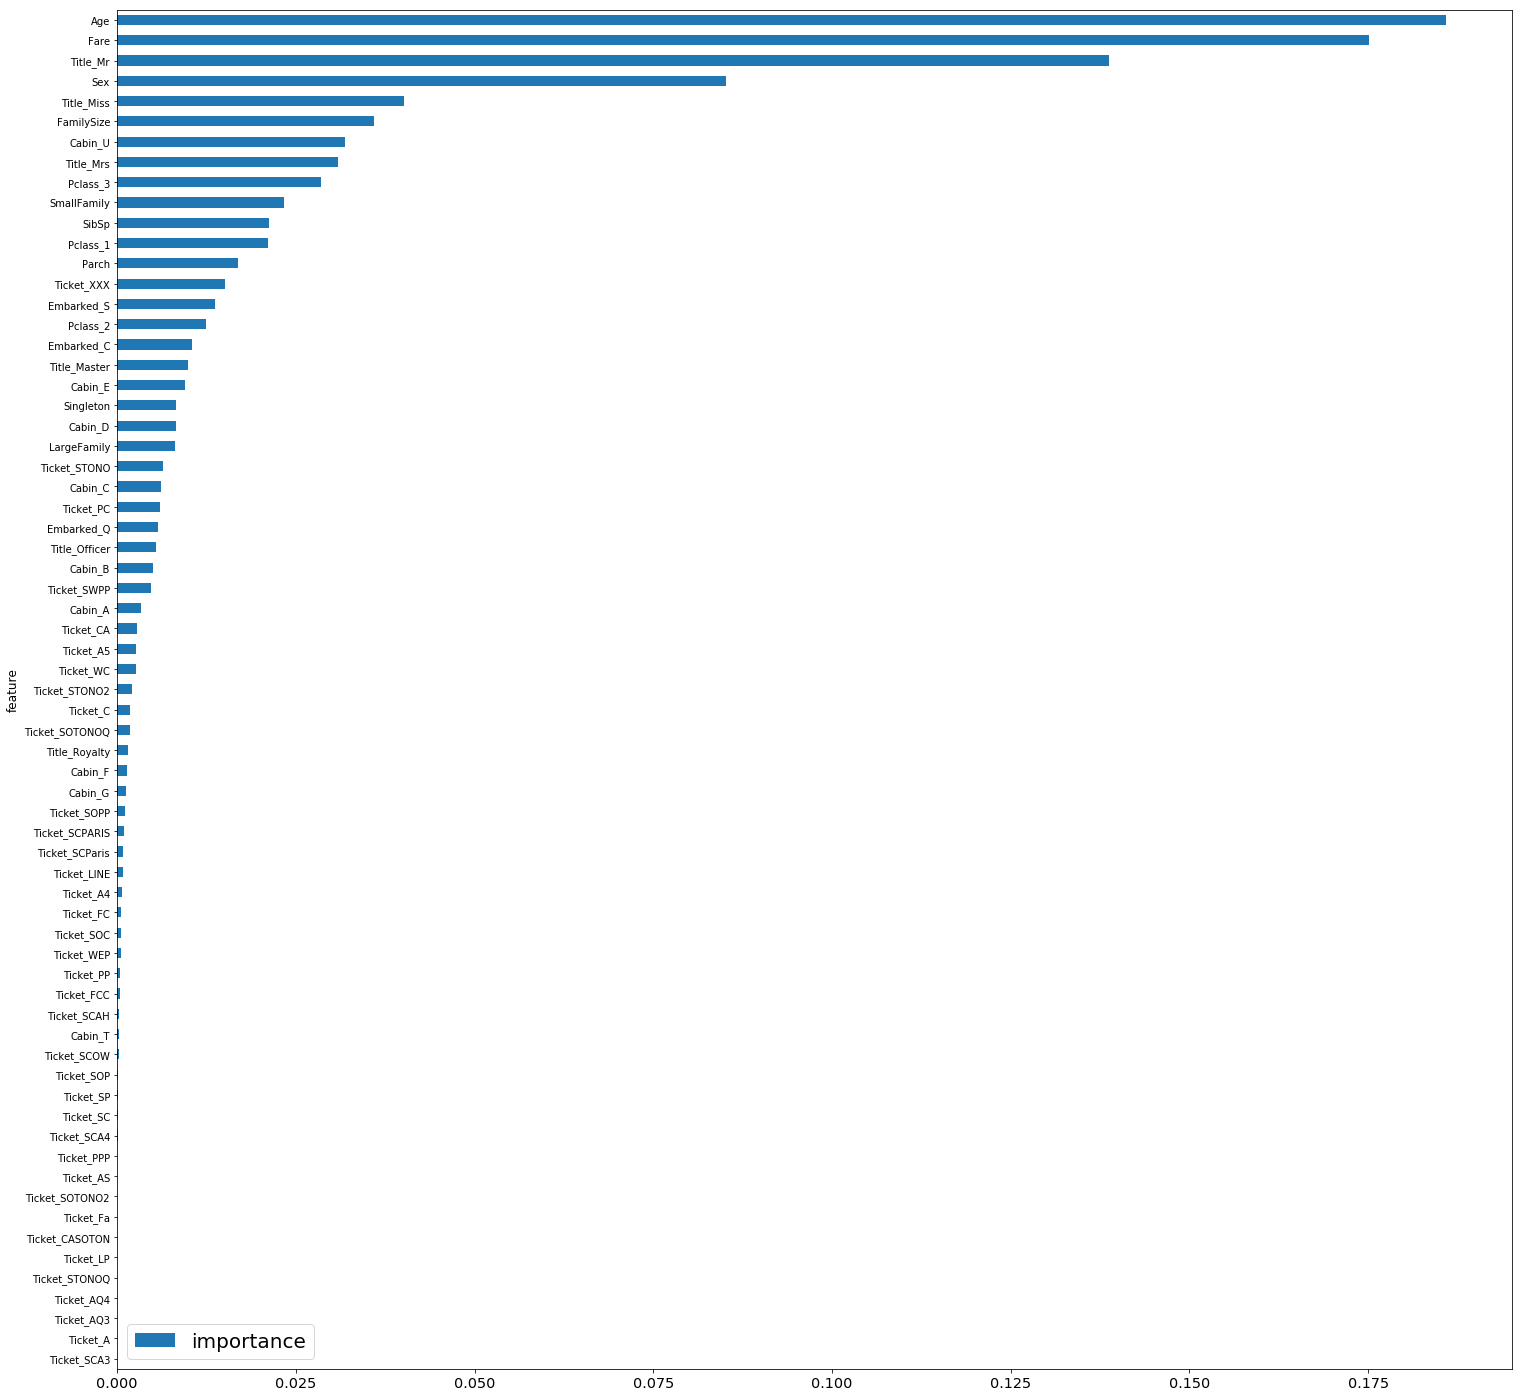

In [106]:
features.plot(kind='barh', figsize=(25,25))

可以看到，Age、Fare、Sex和Title_Mr对模型有很高的重要性。<br \>
下面通过SelectFromModel方法进行特征选择：

In [107]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print(train_reduced.shape)

(891, 14)


In [108]:
test_reduced = model.transform(test)
print(test_reduced.shape)

(418, 14)


### 尝试不同的模型

In [109]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [110]:
for model in models:
    print('Cross Validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=target, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('*****')

Cross Validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8103297873208154
*****
Cross Validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8193060681533748
*****
Cross Validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.810373726809862
*****
Cross Validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8271586116256298
*****


### 调整Hyperparameters

使用全部的测试集进行处理：

In [111]:
# turn run_gs to true if run the gridsearch again
run_gs = True

if run_gs:
    parameter_grid = {
        'max_depth': [4, 6, 8],
        'n_estimators': [50, 10],
        'max_features': ['sqrt', 'auto', 'log2'],
        'min_samples_split': [2, 3, 10],
        'bootstrap': [True, False]
    }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(forest,
                              scoring = 'accuracy',
                              param_grid = parameter_grid,
                              cv = cross_validation,
                              verbose = 1
                              )
    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_
    
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else:
    parameters = {
        'bootstrap': False,
        'min_samples_leaf': 3,
        'n_estimators': 50,
        'min_samples_split': 10,
        'max_features': 'sqrt',
        'max_depth': 6
    }
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score: 0.8361391694725028
Best parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   23.1s finished


最后，生成输出文件：

In [113]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId', 'Survived']].to_csv('gridsearch_rf.csv', index=False)

结果：0.79904